In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # plot
from datetime import datetime

In [2]:
# Load the dataset
df_train = pd.read_csv('train.csv', parse_dates=['Date'])

# Display the information about database
df_train.info()

# Display the first 5 rows of the dataset
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
#Check duplicate:
df_reset = df_train.reset_index()
df_reset[df_reset.duplicated(subset=['Date', 'Store', 'Dept'])]

,index,Store,Dept,Date,Weekly_Sales,IsHoliday


In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


In [5]:
# Group by Store and Date
df_train = df_train.groupby(['Store', 'Date']).sum(['Weekly_Sales'])

# Drop Dept and IsHoliday columns as we will not need this information upon joining with features.csv file
df_train.drop(columns = ['Dept', 'IsHoliday'], inplace = True)
df_train.reset_index(inplace = True)

In [6]:
# Inspect the new data frame
df_train.info()
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB
   Store       Date  Weekly_Sales
0      1 2010-02-05    1643690.90
1      1 2010-02-12    1641957.44
2      1 2010-02-19    1611968.17
3      1 2010-02-26    1409727.59
4      1 2010-03-05    1554806.68


In [7]:
# Read in df_feature data frame
df_feature = pd.read_csv('features.csv', parse_dates = ['Date'])
df_feature.info()
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31

In [8]:
# Create new column IsPromotion - True if there is no null values in any of the 5 MarkDown columns
df_feature['IsMarkdown'] = np.where(df_feature['MarkDown1'].isnull() &
                                    df_feature['MarkDown2'].isnull() &
                                    df_feature['MarkDown3'].isnull() &
                                    df_feature['MarkDown4'].isnull() &
                                    df_feature['MarkDown5'].isnull(), False, True)

df_feature.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True)

In [9]:
# Inspect our new DataFrame
print(df_feature.head())

   Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  IsMarkdown  
0      False       False  
1       True       False  
2      False       False  
3      False       False  
4      False       False  


In [10]:
# Join the two DataFrames
df = df_feature.merge(df_train, on=['Date', 'Store'], how = 'inner')

In [11]:
# Inspect the new data frame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   CPI           6435 non-null   float64       
 5   Unemployment  6435 non-null   float64       
 6   IsHoliday     6435 non-null   bool          
 7   IsMarkdown    6435 non-null   bool          
 8   Weekly_Sales  6435 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1)
memory usage: 364.6 KB


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,False,1643690.90
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,False,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,False,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,False,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,False,1554806.68


In [12]:
# See which stores generate the most and the least sales per week
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean()

avg_weekly_sales.sort_values(ascending = False, inplace =True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, '20'),
  Text(1, 0, '4'),
  Text(2, 0, '14'),
  Text(3, 0, '13'),
  Text(4, 0, '2'),
  Text(5, 0, '10'),
  Text(6, 0, '27'),
  Text(7, 0, '6'),
  Text(8, 0, '1'),
  Text(9, 0, '39'),
  Text(10, 0, '19'),
  Text(11, 0, '31'),
  Text(12, 0, '23'),
  Text(13, 0, '24'),
  Text(14, 0, '11'),
  Text(15, 0, '28'),
  Text(16, 0, '41'),
  Text(17, 0, '32'),
  Text(18, 0, '18'),
  Text(19, 0, '22'),
  Text(20, 0, '12'),
  Text(21, 0, '26'),
  Text(22, 0, '34'),
  Text(23, 0, '40'),
  Text(24, 0, '35'),
  Text(25, 0, '8'),
  Text(26, 0, '17'),
  Text(27, 0, '45'),
  Text(28, 0, '21'),
  Text(29, 0, '25'),
  Text(30, 0, '43'),
  Text(31, 0, '15'),
  Text(32, 0, '7'),
  Text(33, 0, '42'),
  Text(34, 0, '9'),
  Text(35, 0, '29'),
  Text(36, 0, '16'),
  Text(37, 0, '37'),
  Text(38, 0,

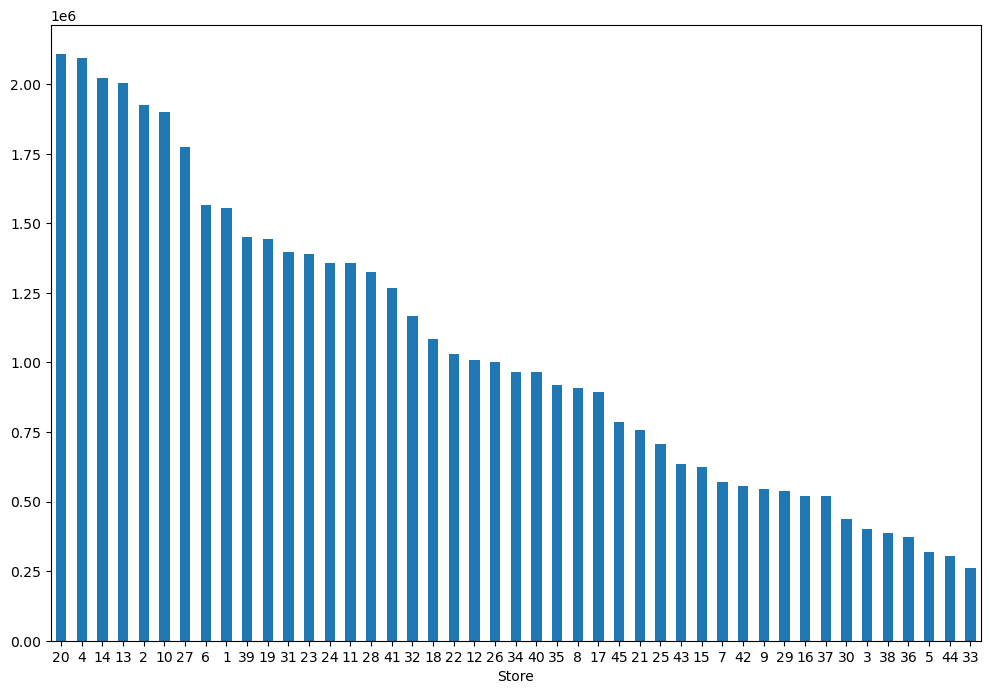

In [13]:
fig = plt.figure(figsize=[12,8])
avg_weekly_sales.plot(kind='bar')
plt.xticks(rotation=0)

Instead of comparing the highest-weekly-sales store to the lowest one, we choose to look at the most *representative* store.

The store that wee will look at is the one with the median average weekly sales - **Store 34**.

In [15]:
# Find the most representative store in the data
store_34 = df[df['Store'] == 34].copy()

# Set 'Date' column as the index of the DataFrame
store_34.set_index('Date', inplace = True)

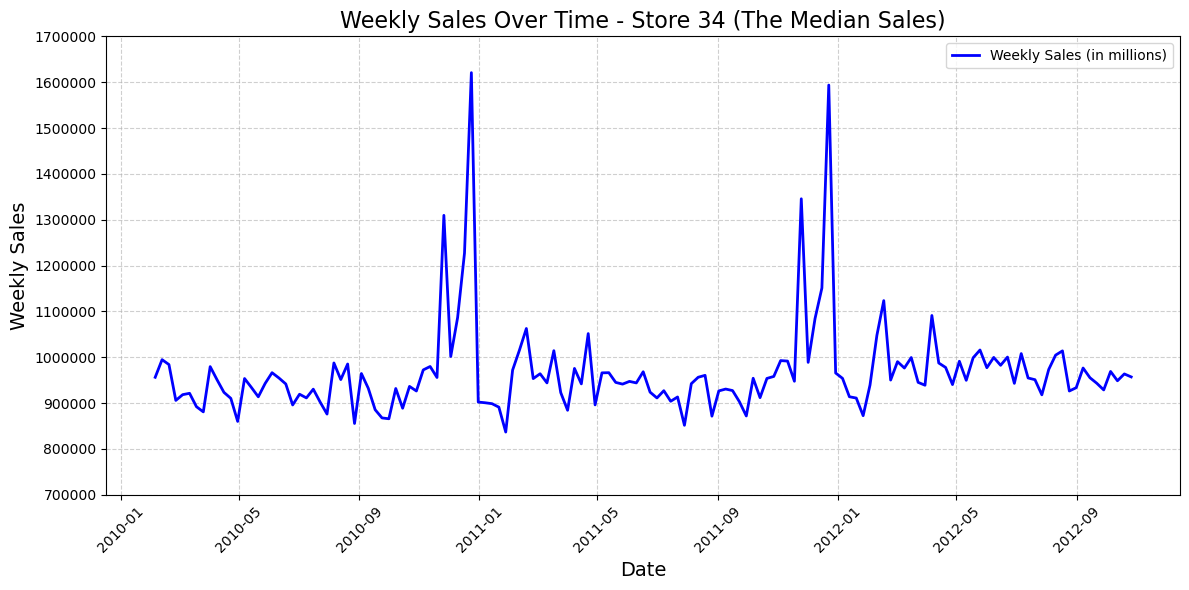

In [16]:
# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the sales line
plt.plot(store_34.index, store_34['Weekly_Sales'] / 1e6, color='blue', linewidth=2, label='Weekly Sales (in millions)')


# Add title and axis labels
plt.title('Weekly Sales Over Time - Store 34 (The Median Sales)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)

# Get the current y-ticks, multiply by 1000000 to convert to full numbers (without decimal)
ticks = plt.gca().get_yticks()
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels([f'{int(tick * 1000000)}' for tick in ticks])


plt.tight_layout()


# Display the plot
plt.show()

In [17]:
# Inspect data
store_34.info()
store_34

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Temperature   143 non-null    float64
 2   Fuel_Price    143 non-null    float64
 3   CPI           143 non-null    float64
 4   Unemployment  143 non-null    float64
 5   IsHoliday     143 non-null    bool   
 6   IsMarkdown    143 non-null    bool   
 7   Weekly_Sales  143 non-null    float64
dtypes: bool(2), float64(5), int64(1)
memory usage: 8.1 KB


,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown,Weekly_Sales
Date,,,,,,,,
2010-02-05,34,35.44,2.598,126.442065,9.521,False,False,956228.96
2010-02-12,34,36.13,2.573,126.496258,9.521,True,False,994610.99
2010-02-19,34,38.36,2.540,126.526286,9.521,False,False,983963.07
2010-02-26,34,37.28,2.590,126.552286,9.521,False,False,905756.13
2010-03-05,34,42.65,2.654,126.578286,9.521,False,False,918295.79
...,...,...,...,...,...,...,...,...
2012-09-28,34,67.06,3.666,131.043000,9.285,False,True,928629.31
2012-10-05,34,65.41,3.620,131.075667,8.839,False,True,968896.68
2012-10-12,34,59.94,3.603,131.108333,8.839,False,True,948613.39


In [18]:
# Adding dummy columns for every month in a year
month = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

store_34[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']] = 0

for i in store_34.index:
    for m_key, m_val in month.items():
        if i.strftime('%m') == m_val:
            store_34.loc[i, m_key] = 1

In [19]:
# Drop January dummies
store_34.drop(columns = 'Jan', inplace = True)

In [20]:
# Set a separate month dummies and IsMarkdwon dummies variable for readability
store_34['IsMarkDown'] = store_34['IsMarkdown'].astype(int)
markdown_and_month = store_34[['IsMarkDown', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].copy()

# Inspect our new dummies
print(markdown_and_month.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IsMarkDown  143 non-null    int32
 1   Feb         143 non-null    int64
 2   Mar         143 non-null    int64
 3   Apr         143 non-null    int64
 4   May         143 non-null    int64
 5   Jun         143 non-null    int64
 6   Jul         143 non-null    int64
 7   Aug         143 non-null    int64
 8   Sep         143 non-null    int64
 9   Oct         143 non-null    int64
 10  Nov         143 non-null    int64
 11  Dec         143 non-null    int64
dtypes: int32(1), int64(11)
memory usage: 18.0 KB
None


In [46]:
# Fit AutoRegressive model with the dummies created above
from statsmodels.tsa.ar_model import AutoReg

store_34_model = AutoReg(store_34['Weekly_Sales'], lags=4, exog = markdown_and_month).fit()
print(store_34_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                   AutoReg-X(4)   Log Likelihood               -1749.267
Method:               Conditional MLE   S.D. of innovations          70665.771
Date:                Sun, 11 May 2025   AIC                           3534.534
Time:                        22:45:05   BIC                           3587.355
Sample:                    03-05-2010   HQIC                          3555.999
                         - 10-26-2012                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.508e+05   1.86e+05      2.427      0.015    8.68e+04    8.15e+05
Weekly_Sales.L1    -0.3085      0.087     -3.529      0.000      -0.480      -0.137
Weekly_Sales.L2     0.0816      

C:\Users\npmn9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [48]:
# Get predicted mean values for in-sample data points
pred_in_sample = store_34_model.get_prediction(start=0, end=142, exog_oos=markdown_and_month[:])
pred_mean_in_sample = pred_in_sample.predicted_mean.dropna()
pred_mean_in_sample = pd.DataFrame(pred_mean_in_sample)
print(pred_mean_in_sample)

# Confidence Interval
conf_interval = pred_in_sample.conf_int().dropna()
print(conf_interval)

            predicted_mean
2010-03-05   936535.002524
2010-03-12   941916.723220
2010-03-19   930270.278332
2010-03-26   906828.762723
2010-04-02   953685.423590
...                    ...
2012-09-28   934597.171442
2012-10-05   982142.601897
2012-10-12   958261.131703
2012-10-19   961221.841789
2012-10-26   952416.429331

[139 rows x 1 columns]
                    lower         upper
2010-03-05  798032.636771  1.075037e+06
2010-03-12  803414.357467  1.080419e+06
2010-03-19  791767.912578  1.068773e+06
2010-03-26  768326.396970  1.045331e+06
2010-04-02  815183.057836  1.092188e+06
...                   ...           ...
2012-09-28  796094.805689  1.073100e+06
2012-10-05  843640.236144  1.120645e+06
2012-10-12  819758.765950  1.096763e+06
2012-10-19  822719.476036  1.099724e+06
2012-10-26  813914.063578  1.090919e+06

[139 rows x 2 columns]


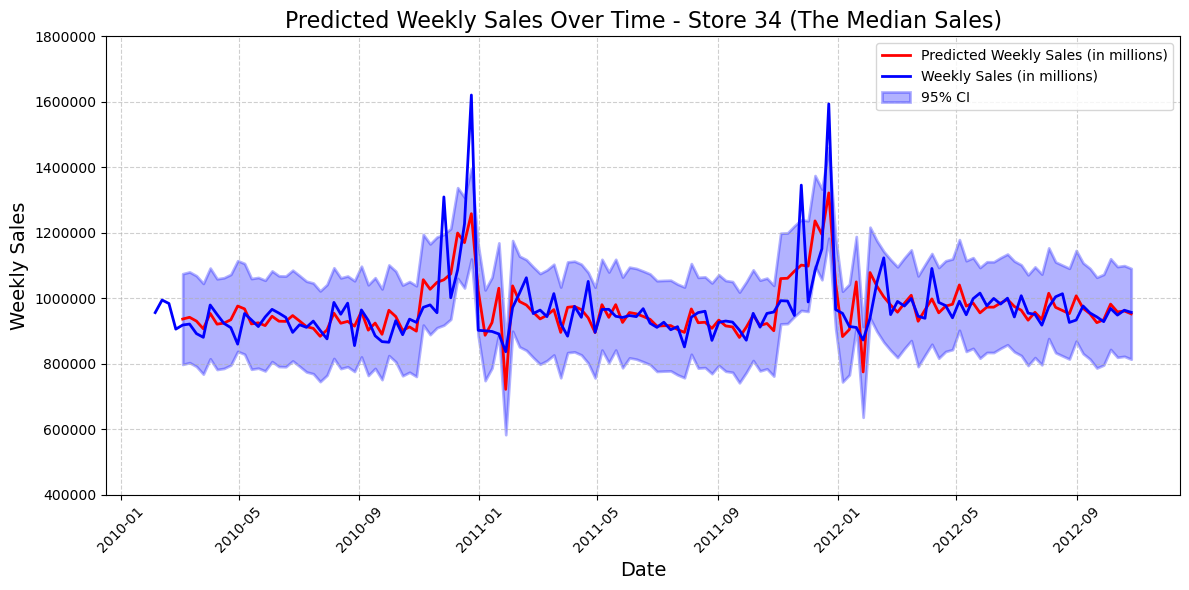

In [50]:
# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the sales line
plt.plot(pred_mean_in_sample.index, pred_mean_in_sample['predicted_mean'] / 1e6, color='red', linewidth=2, label='Predicted Weekly Sales (in millions)')
plt.plot(store_34.index, store_34['Weekly_Sales'] / 1e6, color='blue', linewidth=2, label='Weekly Sales (in millions)')
plt.fill_between(pred_mean_in_sample.index, conf_interval.lower / 1e6, conf_interval.upper / 1e6, color='blue', alpha=0.3, linewidth=2, label='95% CI')

# Add title and axis labels
plt.title('Predicted Weekly Sales Over Time - Store 34 (The Median Sales)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)

# Get the current y-ticks, multiply by 1000000 to convert to full numbers (without decimal)
ticks = plt.gca().get_yticks()
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels([f'{int(tick * 1000000)}' for tick in ticks])


plt.tight_layout()


# Display the plot
plt.show()